In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

### function to calculate iso_corr_cross_section + stat. uncertainties

In [2]:
def stat_errors_neutron(filename,target_thickness):
    targettype = None
    factor = None
    n_t = None
    delta_n_t = None
    new_density = 1.851
    T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
    T_1086 = (new_density)*(1.0793)*(6.02214076)*(pow(10,23))/(12.011);
    T_54 = (new_density)*(0.5451)*(6.02214076)*(pow(10,23))/(12.011);
    if (target_thickness == "thin"):
        targettype = "c_54"
        factor = (1./T_54)*(pow(10,27))
        n_t = T_54
        delta_n_t = 0.000648
    if (target_thickness == "medium"):
        targettype = "c_1086"
        n_t = T_1086
        delta_n_t = 0.002620
        factor = (1./T_1086)*(pow(10,27))
    if (target_thickness == "thick"):
        targettype = "c_2198"
        n_t = T_2198
        delta_n_t = 0.000322
        factor = (1./T_2198)*(pow(10,27))
        
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","d_reacted_carbon","all_carbon"])
    df["d_12c_survived"] = 1- df["d_reacted_carbon"]
    
    error_val = []
    iso_cs_val = []
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
        iso_cs = factor*(-math.log(d_iso))
        #print("iso_cross_section:  ", iso_cs)
        r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']) 
        r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
        n_i_t = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['all_carbon'])
        n_i_e = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['all_carbon'])
        target_error = pow(iso_cs*delta_n_t,2)
        #print(target_error)
        #print(iso_cs)
        iso_cs_val.append(iso_cs)
        #print("survived target\t",r_survived_target)
        counting_error = (pow(10,54))*(1./(n_t*n_t))*((1-r_survived_target)/(r_survived_target*n_i_t)+(1-r_survived_empty)/(r_survived_empty*n_i_e))
        #print(counting_error)
        total_error = math.sqrt(target_error + counting_error)
        #print("total error\t",total_error)
        error_val.append(total_error)
    return iso_cs_val,error_val

### first method: MWPC2 and MWPC3 hit-level data
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

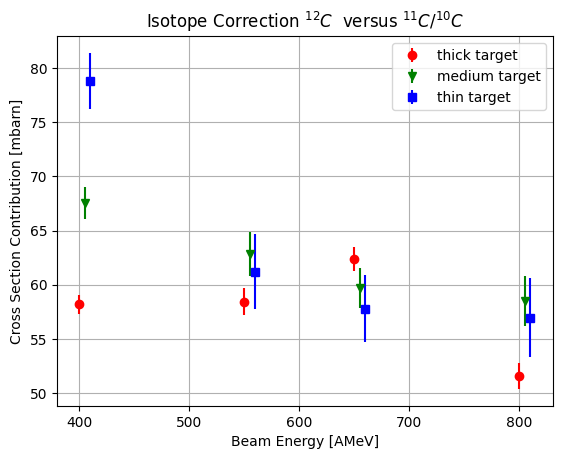

In [3]:
f_name = "./with_stats_iso_corr/stats_inc_mw23_default.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")


fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
plt.savefig("iso_corr_cs_mw23_hit.png")


---

### second method: MWPC2 and MWPC3 own clustered data
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

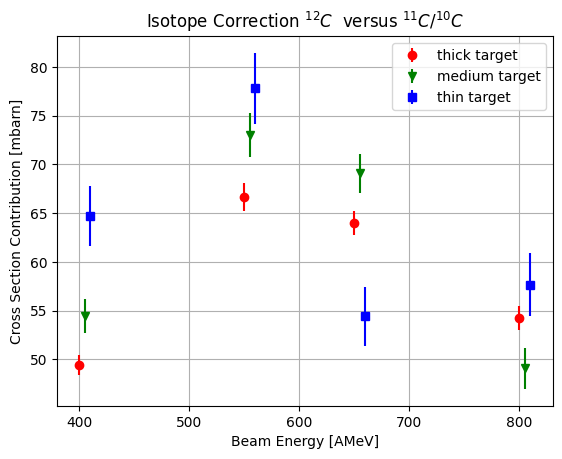

In [4]:
f_name = "./with_stats_iso_corr/stats_inc_mw23_own_clustering.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")


fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
plt.savefig("iso_corr_cs_mw23_own_cluster.png")

---

### third method: MWPC1 and MWPC3 hit-level data
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

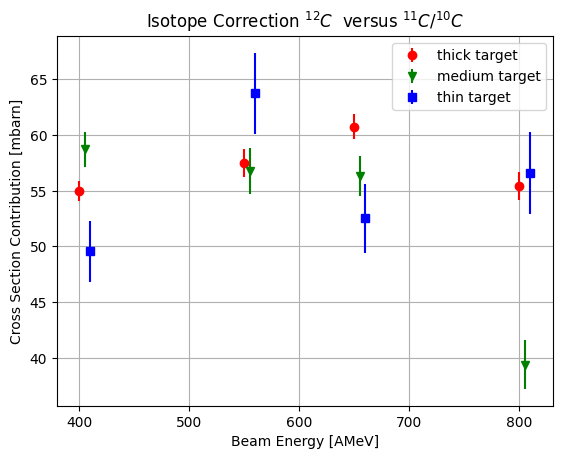

In [5]:
f_name = "./with_stats_iso_corr/stats_inc_mw13_default.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")


fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
plt.savefig("iso_corr_cs_mw13_hit.png")

---

### fourth method: MWPC1 and MWPC3 own clustered data
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

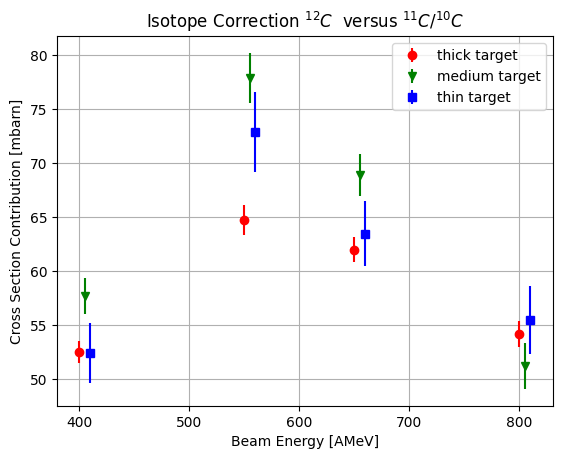

In [6]:
f_name = "./with_stats_iso_corr/stats_inc_mw13_own_clustering.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")


fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
plt.savefig("iso_corr_cs_mw13_own_cluster.png")

---

---

## Quadrant check, using own clustering MW2/MW3

---

In [7]:
ax_coll = []

### Quadrant 4
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

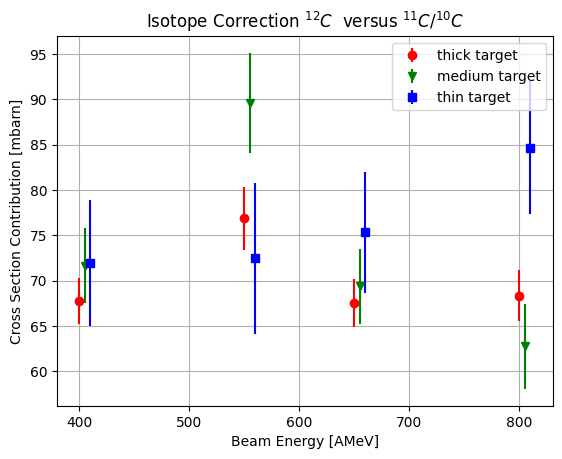

In [8]:
f_name = "./with_stats_iso_corr/stats_inc_mw23_quad4_own_clustering.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")
quad4_thin, err_quad4_thin = iso_cs_thin,err_iso_thin
quad4_medium, err_quad4_medium = iso_cs_medium,err_iso_medium
quad4_thick, err_quad4_thick = iso_cs_thick,err_iso_thick

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
ax_coll.append(ax)
#ax.set_ylim(43,90)

---

### Quadrant 1
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

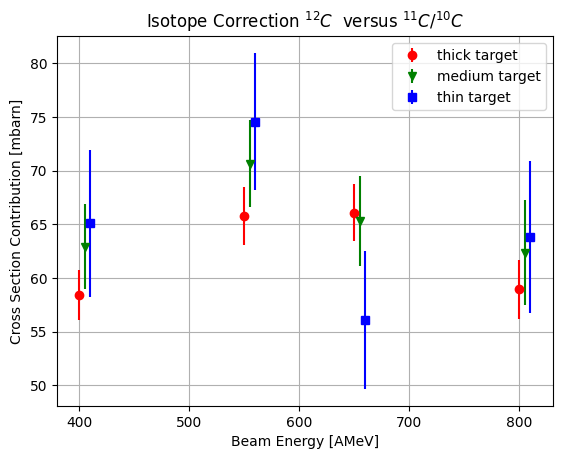

In [9]:
f_name = "./with_stats_iso_corr/stats_inc_mw23_quad1_own_clustering.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")
quad1_thin, err_quad1_thin = iso_cs_thin,err_iso_thin
quad1_medium, err_quad1_medium = iso_cs_medium,err_iso_medium
quad1_thick, err_quad1_thick = iso_cs_thick,err_iso_thick

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
ax_coll.append(ax)

---

### Quadrant 2
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

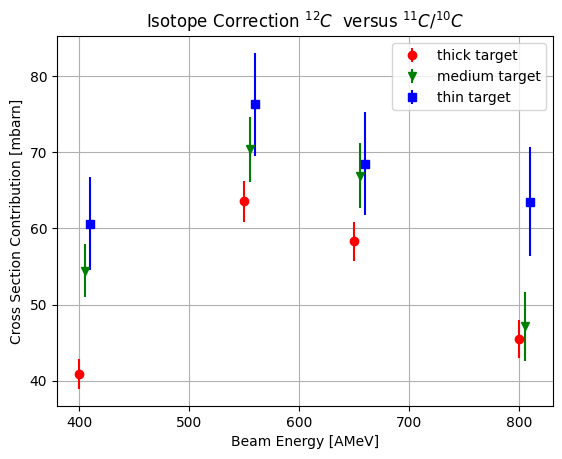

In [10]:
f_name = "./with_stats_iso_corr/stats_inc_mw23_quad2_own_clustering.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")
quad2_thin, err_quad2_thin = iso_cs_thin,err_iso_thin
quad2_medium, err_quad2_medium = iso_cs_medium,err_iso_medium
quad2_thick, err_quad2_thick = iso_cs_thick,err_iso_thick

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
ax_coll.append(ax)

---

### Quadrant 3
---

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

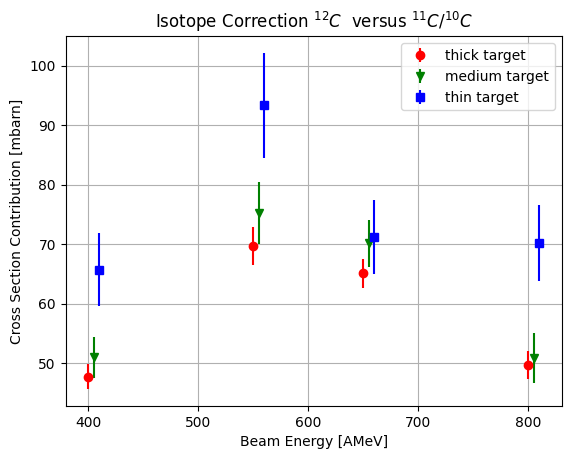

In [11]:
f_name = "./with_stats_iso_corr/stats_inc_mw23_quad3_own_clustering.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")
quad3_thin, err_quad3_thin = iso_cs_thin,err_iso_thin
quad3_medium, err_quad3_medium = iso_cs_medium,err_iso_medium
quad3_thick, err_quad3_thick = iso_cs_thick,err_iso_thick

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$')
#ax.set_ylim(43,90)
ax_coll.append(ax)

---

### all Quadrants in one plot

/tmp/ipykernel_19650/2930983827.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[0,0].errorbar(energy,quad2_thick,yerr=err_quad2_thick,label="thick target",color='red',marker="o",fmt="o")
/tmp/ipykernel_19650/2930983827.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[0,0].errorbar(energy,quad2_medium,yerr=err_quad2_medium,label="medium target",color='green',marker="o",fmt="o")
/tmp/ipykernel_19650/2930983827.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[0,0].errorbar(energy,quad2_thin,yerr=err_quad2_thin,label="thin target",color='blue',marker="o",fmt="o")
/tmp/ipykernel_19650/2930983827.py:14: UserWarning: marker is redunda

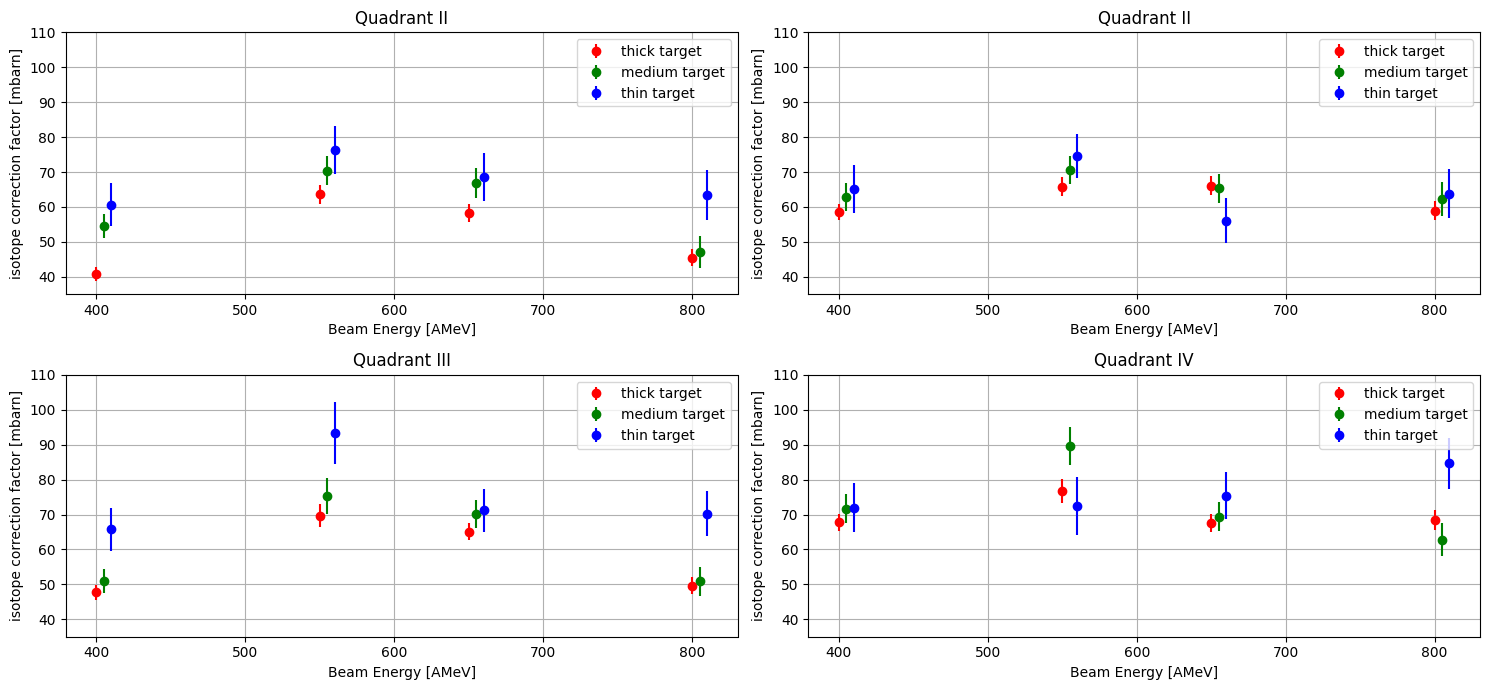

In [12]:

fig, ax = plt.subplots(2,2,figsize=(15,7))

fig.tight_layout()

energy = [400,550,650,800]
ax[0,0].errorbar(energy,quad2_thick,yerr=err_quad2_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax[0,0].errorbar(energy,quad2_medium,yerr=err_quad2_medium,label="medium target",color='green',marker="o",fmt="o")
energy = [410,560,660,810]
ax[0,0].errorbar(energy,quad2_thin,yerr=err_quad2_thin,label="thin target",color='blue',marker="o",fmt="o")
ax[0,0].grid()

energy = [400,550,650,800]
ax[0,1].errorbar(energy,quad1_thick,yerr=err_quad1_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax[0,1].errorbar(energy,quad1_medium,yerr=err_quad1_medium,label="medium target",color='green',marker="o",fmt="o")
energy = [410,560,660,810]
ax[0,1].errorbar(energy,quad1_thin,yerr=err_quad1_thin,label="thin target",color='blue',marker="o",fmt="o")
ax[0,1].grid()

energy = [400,550,650,800]
ax[1,0].errorbar(energy,quad3_thick,yerr=err_quad3_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax[1,0].errorbar(energy,quad3_medium,yerr=err_quad3_medium,label="medium target",color='green',marker="o",fmt="o")
energy = [410,560,660,810]
ax[1,0].errorbar(energy,quad3_thin,yerr=err_quad3_thin,label="thin target",color='blue',marker="o",fmt="o")
ax[1,0].grid()

energy = [400,550,650,800]
ax[1,1].errorbar(energy,quad4_thick,yerr=err_quad4_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax[1,1].errorbar(energy,quad4_medium,yerr=err_quad4_medium,label="medium target",color='green',marker="o",fmt="o")
energy = [410,560,660,810]
ax[1,1].errorbar(energy,quad4_thin,yerr=err_quad4_thin,label="thin target",color='blue',marker="o",fmt="o")
ax[1,1].grid()

##set title of supfigures:
ax[0,0].set_title("Quadrant II")
ax[0,1].set_title("Quadrant II")
ax[1,0].set_title("Quadrant III")
ax[1,1].set_title("Quadrant IV")
for i in range(2):
    for j in range(2):
        ax[i,j].legend()
        ax[i,j].set_xlabel("Beam Energy [AMeV]")
        ax[i,j].set_ylabel("isotope correction factor [mbarn]")
        ax[i,j].set_ylim([35, 110])
fig.tight_layout()
plt.savefig("iso_corr_cs_mw23_own_cluster_all_quadrants.png")

---

### idea: clean up MW12-> diagonal cut, and plot then Quadrant4

/tmp/ipykernel_19650/420099994.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  d_iso = (float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived']))/(float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived']))
/tmp/ipykernel_19650/420099994.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_target = float(df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_19650/420099994.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r_survived_empty = float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['d_12c_survived'])
/tmp/ipykernel_196

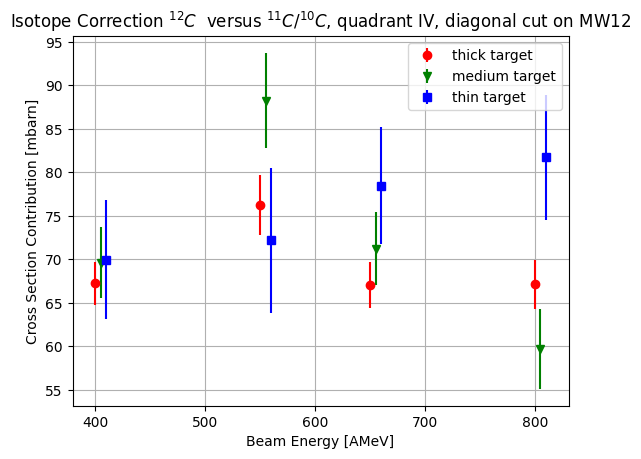

In [16]:
f_name = "./with_stats_iso_corr/stats_inc_mw23_quad4_own_clustering_mw12_diag_cut.txt"
iso_cs_thin,err_iso_thin = stat_errors_neutron(f_name,"thin")
iso_cs_medium, err_iso_medium= stat_errors_neutron(f_name,"medium")
iso_cs_thick,err_iso_thick = stat_errors_neutron(f_name,"thick")
quad4_thin, err_quad4_thin = iso_cs_thin,err_iso_thin
quad4_medium, err_quad4_medium = iso_cs_medium,err_iso_medium
quad4_thick, err_quad4_thick = iso_cs_thick,err_iso_thick

fig, ax = plt.subplots()
#fig.tight_layout()
energy = [400,550,650,800]
ax.errorbar(energy,iso_cs_thick,yerr=err_iso_thick,label="thick target",color='red',marker="o",fmt="o")
energy = [405,555,655,805]
ax.errorbar(energy,iso_cs_medium,yerr=err_iso_medium,label="medium target",color='green',marker="v",fmt="o")
energy = [410,560,660,810]
ax.errorbar(energy,iso_cs_thin,yerr=err_iso_thin,label="thin target",color='blue',marker="s",fmt="o")
ax.legend()
ax.grid()
ax.set_xlabel("Beam Energy [AMeV]")
ax.set_ylabel("Cross Section Contribution [mbarn]")
ax.set_title(r'Isotope Correction $^{12}C$  versus $^{11}C/^{10}C$, quadrant IV, diagonal cut on MW12')
ax_coll.append(ax)
#ax.set_ylim(43,90)